## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, 
you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.
##### The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

## Goal

#### Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
#Importing Necessary Libaries and Supress unnecessary warnings 
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [2]:
#Importing lead dataset 
lead_data = pd.read_csv("Leads.csv")
lead_data


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


## Data Inspection

In [3]:
#checking the shape of the data 
lead_data.shape

(9240, 37)

In [4]:
# Check the info to see the types of the feature variables and the null values present 
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Looks like there are few categorical variable in this dataset, Also there are lots of null values present as well, So we will need to treat them accordingly

In [5]:
#Checking the summary of the data set  
lead_data.describe() 


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleansing and Preparation

In [6]:
# checking the cloumns with null values 
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Finding the null percentage across columns 
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

#### we see that for some columns we have high percentage of missing values. we can drop the columns with missing values greater than 40%

In [8]:
# Droping the columns with the missing values greater then or equal to 40% 
lead_data = lead_data.drop(columns = ["Lead Quality", "Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"])


In [9]:
# Checking the null percentage again after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

### Dealing with the columns null values one by one 


###  Column : Country 

In [10]:
# Country columns has 27% missing values 
lead_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

Since the most values are "india" we can impute missing values in this columns with this value 

In [11]:
#Imputing the missing data in the 'Country' column with 'India'
lead_data['Country'] = lead_data['Country'].replace(np.nan,'India')

### Column: 'Specialization'
This column has 37% missing values

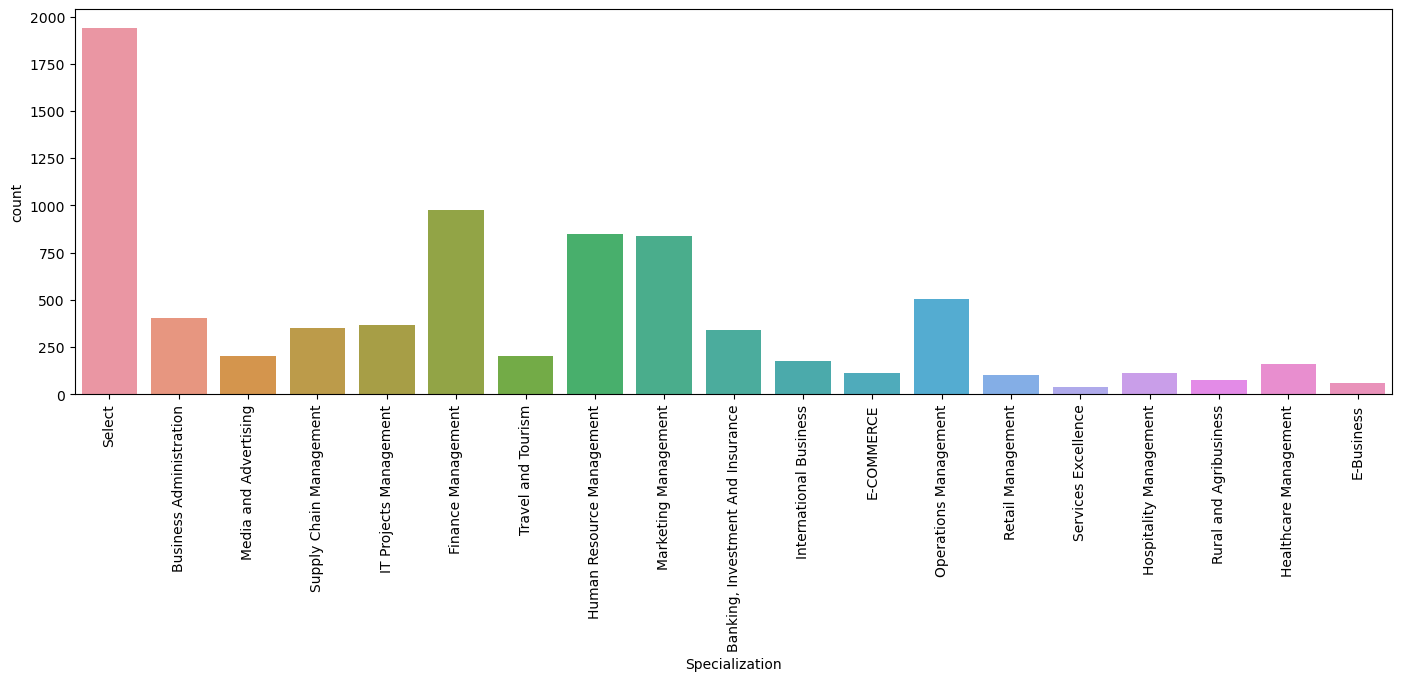

In [12]:
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation=90)
plt.show()


There is 37% missing values present in the Specialization columns. It may be possible that the lead may leave this collumns blank if they are students or not having any specialization or his specilization is not there in the option given. So we can create a another category 'Others' for this.

In [13]:
#Creating a separeate category called 'Others' for this 
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan,'Others')

### Columns : Tags 
'Tags' column has 36% missing values

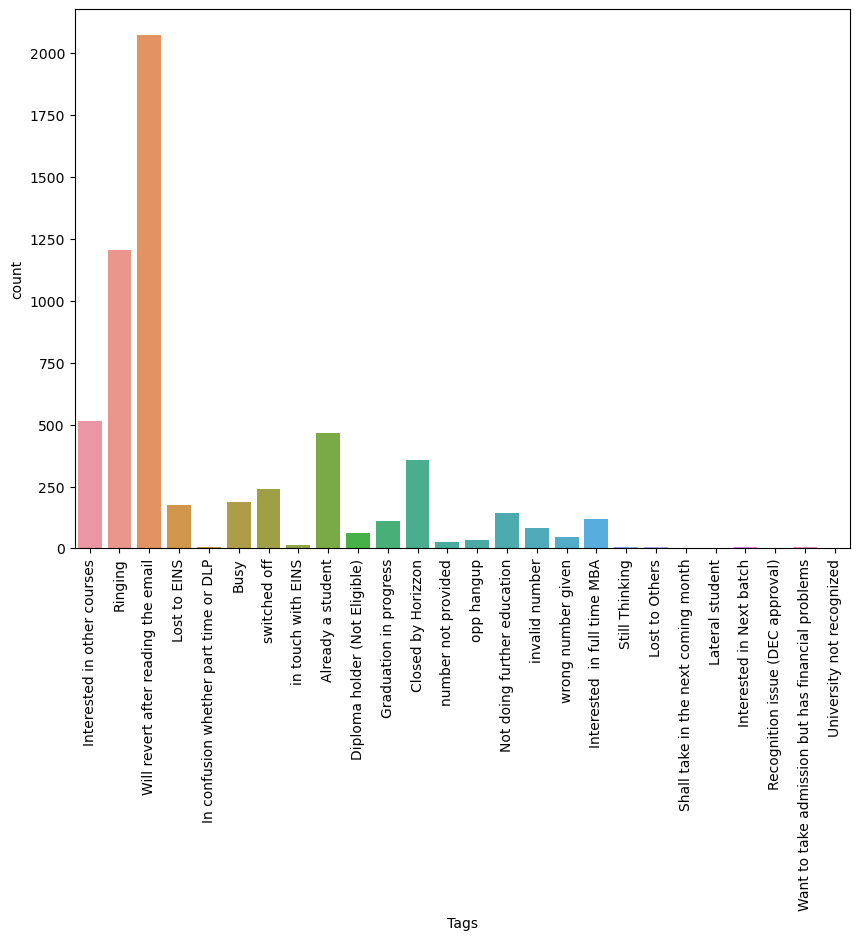

In [14]:
#Visualizing Tags column 
plt.figure(figsize = (10,7))
sns.countplot(lead_data['Tags'])
plt.xticks(rotation = 90)
plt.show()

In [15]:
#Imputing the missing data in the tags columns with 'will revert after reading the email'
lead_data['Tags'] = lead_data['Tags'].replace(np.nan, 'Will revert after reading the email')


### Column: 'What matters most to you in choosing a course'
this column has 29% missing values

In [16]:
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We can see that this column is highly skewed column so we can remove this column.

In [17]:
lead_data = lead_data.drop('What matters most to you in choosing a course', axis = 1)

### Column: 'What is your current occupation'
this column has 29% missing values

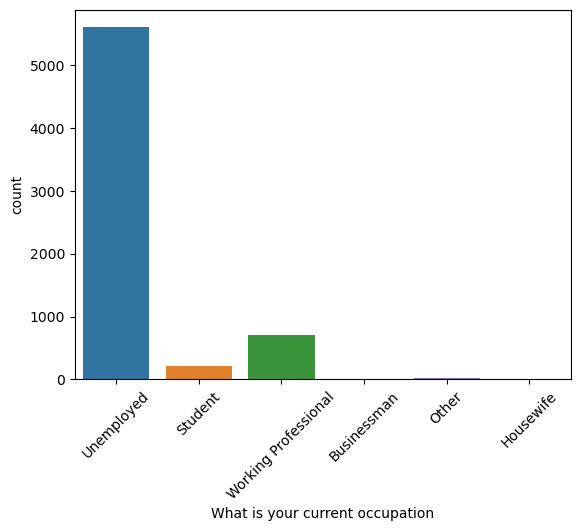

In [18]:
sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation = 45)
plt.show()

In [19]:
#Finding the percentage of the different categories of this column: 
round(lead_data['What is your current occupation'].value_counts(normalize = True), 2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

Since the most values are unemployed we can impute missing values in this coloumn with this value 


In [20]:
#imputing the missing data in the "What is your current occupation" column with 'Unemployed'
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')

### Column: 'City'
This column has 15% missing values

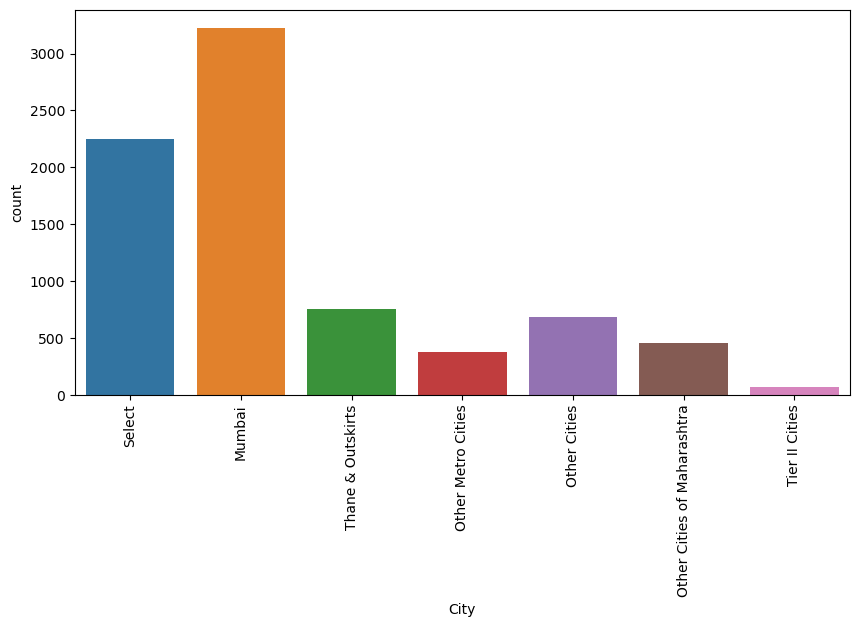

In [21]:
plt.figure(figsize = (10, 5))
sns.countplot(lead_data['City'])
plt.xticks(rotation = 90)
plt.show()


In [22]:
#Finding the percentage of the different categories of this column: 
round(lead_data['City'].value_counts(normalize = True),2)*100


Mumbai                         41.0
Select                         29.0
Thane & Outskirts              10.0
Other Cities                    9.0
Other Cities of Maharashtra     6.0
Other Metro Cities              5.0
Tier II Cities                  1.0
Name: City, dtype: float64

Since most values are 'Mumbai', we can impute missing values in this column with this value 


In [23]:
#Imputing the missing data in the 'City' column with 'Mumbai'
lead_data['City'] = lead_data['City'].replace(np.nan,'Mumbai')


In [24]:
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                      0.0
Specialization                               0.0
How did you hear about X Education          24.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisemen

### Column : 'How did you hear about X Education'
'How did you hear about X Education' has 24% missing values

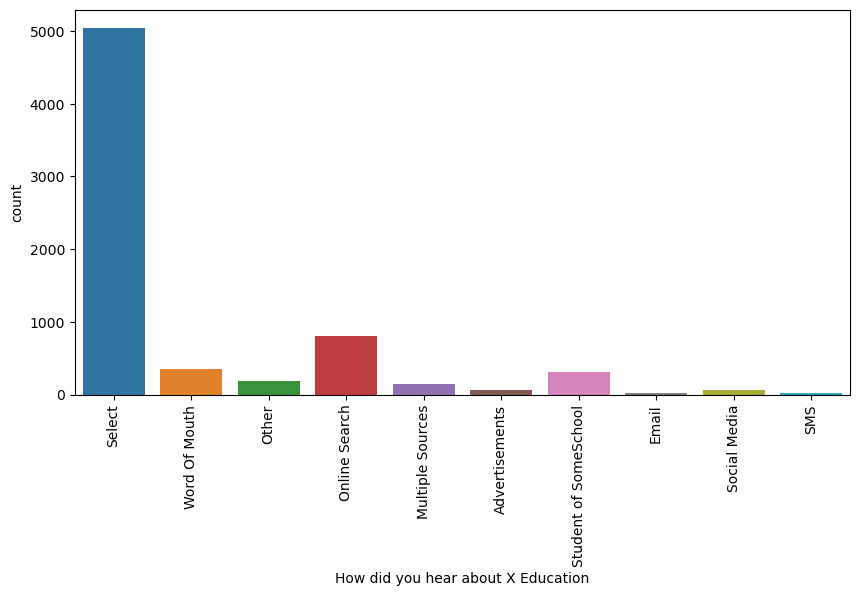

In [25]:
plt.figure(figsize = (10,5))
sns.countplot(lead_data['How did you hear about X Education'])
plt.xticks(rotation = 90)
plt.show()

In [26]:
#finding the percentage of the different categories of this column: 
round(lead_data['How did you hear about X Education'].value_counts(normalize = True),2)*100

Select                   72.0
Online Search            11.0
Word Of Mouth             5.0
Student of SomeSchool     4.0
Other                     3.0
Multiple Sources          2.0
Advertisements            1.0
Social Media              1.0
Email                     0.0
SMS                       0.0
Name: How did you hear about X Education, dtype: float64

We can see the data is highly skewed we can drop  "How did you hear about X Education" coloum 


In [27]:
lead_data = lead_data.drop('How did you hear about X Education', axis = 1) 

### Column : 'Lead Profile'
Column 'Lead Profile' has 29% missing value


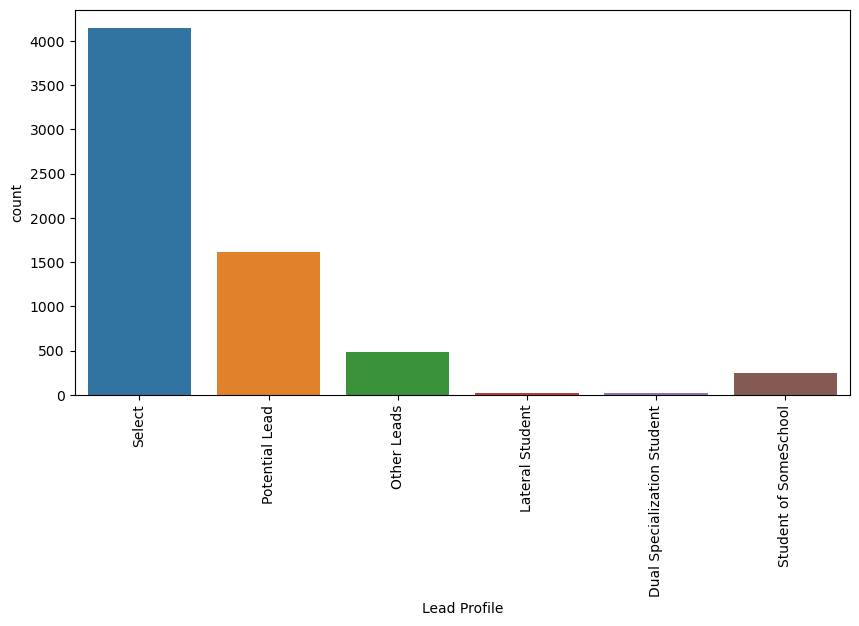

In [28]:
plt.figure(figsize = (10,5))
sns.countplot(lead_data['Lead Profile'])
plt.xticks(rotation = 90)
plt.show()


The data is highly skewed also the coloum necessity is low, so we will drop this one too

In [29]:
#Droping the lead profile column
lead_data = lead_data.drop('Lead Profile', axis = 1)

Droping the row with 1% null values 

In [30]:
#Droping the rows with null values 
lead_data.dropna(inplace = True)

In [31]:
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now we don't have any missing value in the dataset

### We can find the percentage of rows retained


In [32]:
#Percentage of rows retained 
(len(lead_data.index)/9240)*100

98.2034632034632

We have retained 98% of the rows after clearing the data

### Exploratory Data Analysis

Checking for duplicates 


In [33]:
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


We see there are no duplicate records in our lead dataset

### Univariate Analysis and Bivariate Analysis

### Converted
##### Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [34]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

### Lead Origin

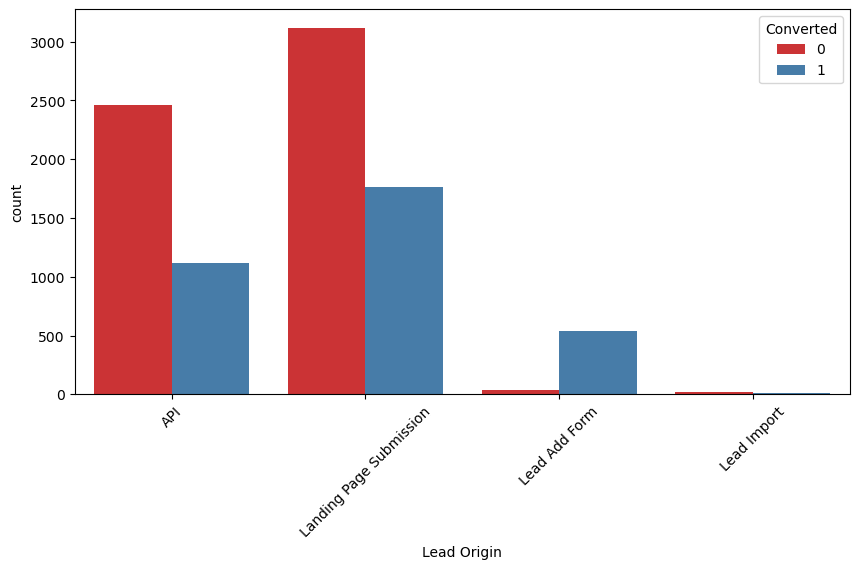

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 45)
plt.show()


### Inference :
* API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
* Lead Add Form has more than 90% conversion rate but count of lead are not very high.
* Lead Import are very less in count.
#### To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

#### Lead Source

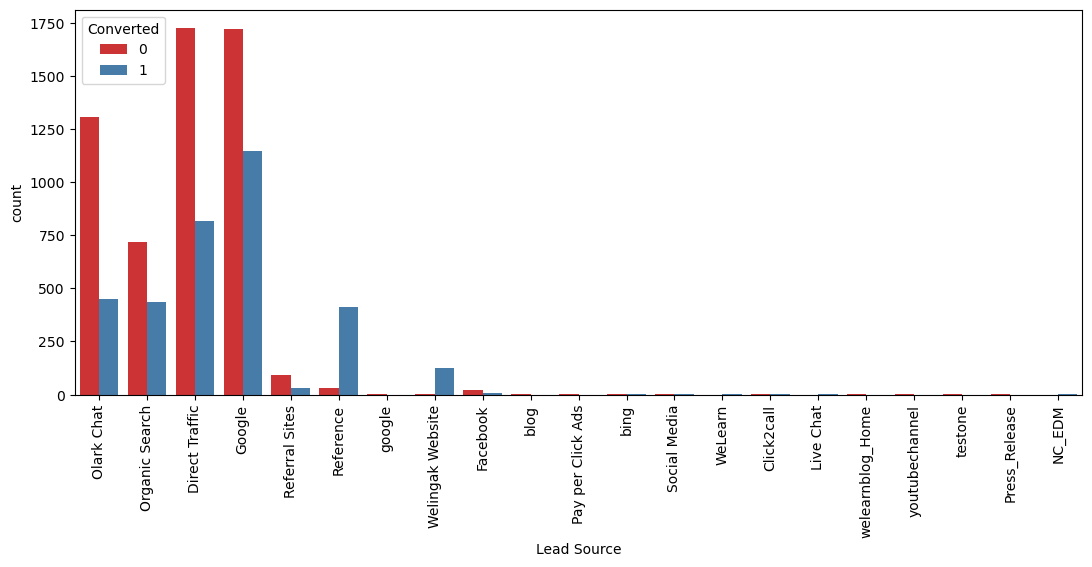

In [36]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [37]:
#Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')


In [38]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

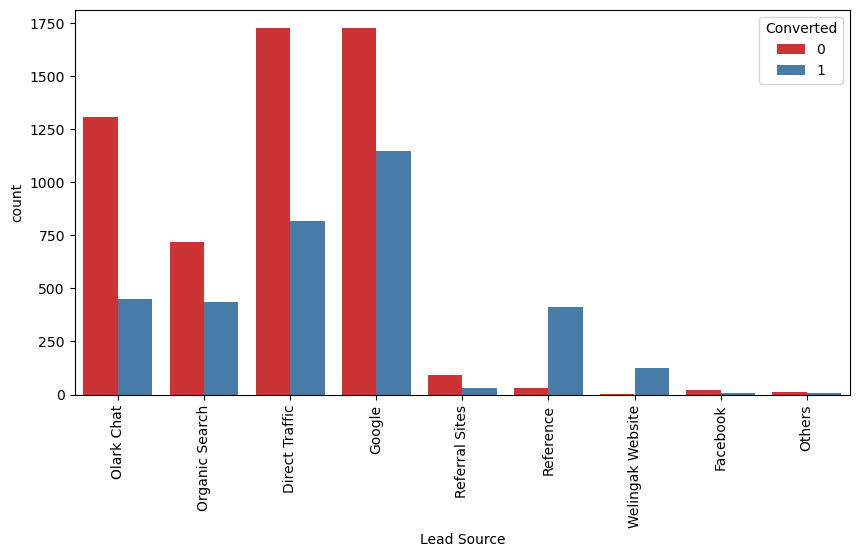

In [39]:
#visulising again 
plt.figure(figsize = (10,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference

* Google and Direct traffic generates maximum number of leads.
* Conversion Rate of reference leads and leads through welingak website is high.

#### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

### Do not call

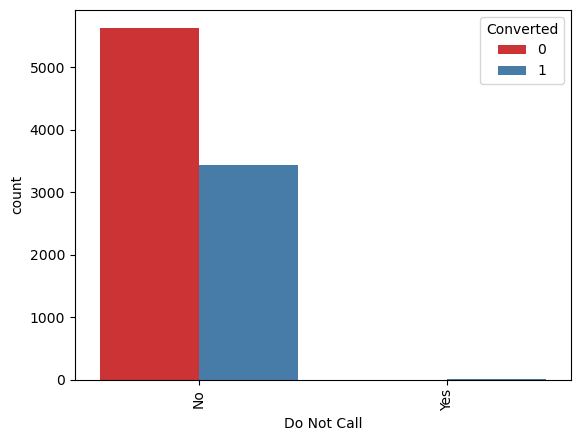

In [40]:
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = lead_data, palette= 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### Total Visits

In [41]:
#getting the idea of data spread percentiles wise 
lead_data['TotalVisits'].describe(percentiles = [0.05, .25,.5,.75,.90,.95,.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

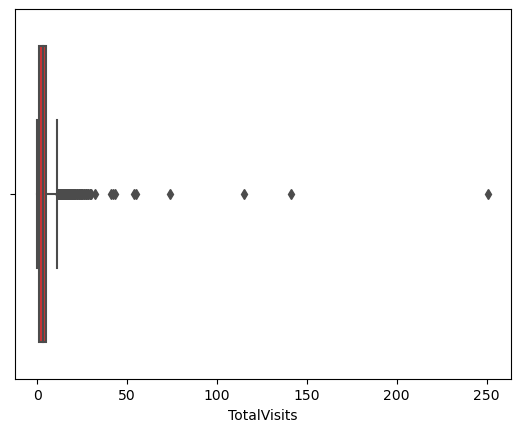

In [42]:
 # visualizing the data to check for data outliers 
sns.boxplot(lead_data['TotalVisits'],orient = 'vert', palette = 'Set1')
plt.show()



As we can see there are a number of outliers in the data. we will cap the outliers to 95% for analysis 


In [43]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

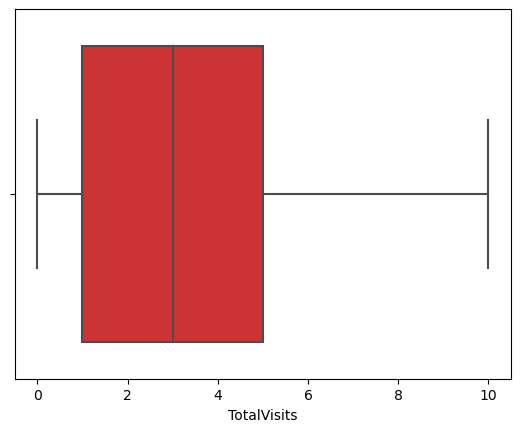

In [44]:
#Visulizing again 
sns.boxplot(lead_data['TotalVisits'], orient = 'vert', palette = 'Set1')
plt.show()

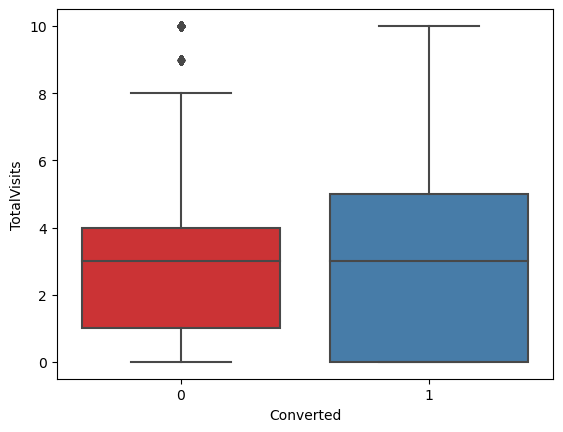

In [45]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data, palette = 'Set1')
plt.show()

### Inference
* Median for converted and not converted leads are the same.
* Nothing can be concluded on the basis of Total Visits.

### Total Time Spent on Website

In [46]:
lead_data["Total Time Spent on Website"].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

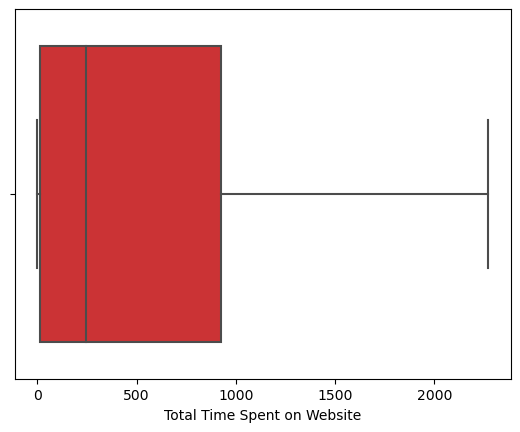

In [47]:
sns.boxplot(lead_data['Total Time Spent on Website'], orient = 'vert', palette = 'Set1')
plt.show()

### Inference
Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.

### Page Views Per Visit

In [48]:
lead_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

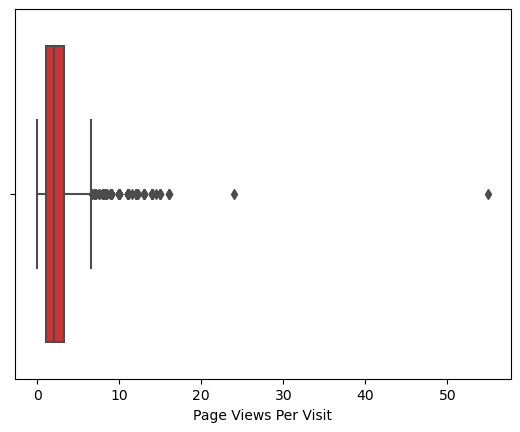

In [49]:
sns.boxplot(lead_data['Page Views Per Visit'],orient = 'vert', palette = 'Set1')
plt.show()

#### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [50]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

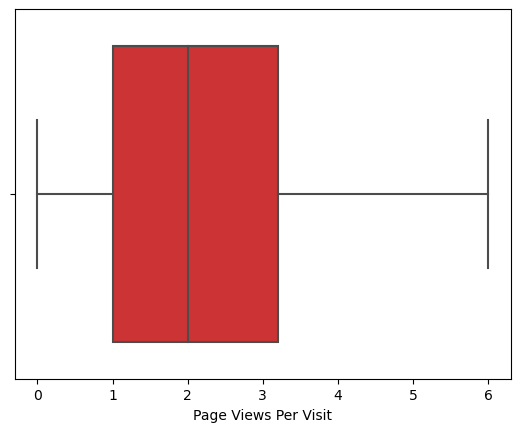

In [51]:
#Visualizing again 
sns.boxplot(lead_data['Page Views Per Visit'], palette = 'Set1')
plt.show()

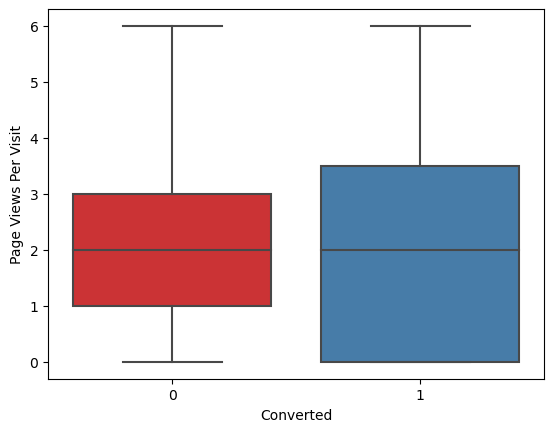

In [52]:
#Categorical visulaization 
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data, palette = 'Set1')
plt.show()

### Inference
Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

### Last Activity

In [53]:
lead_data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

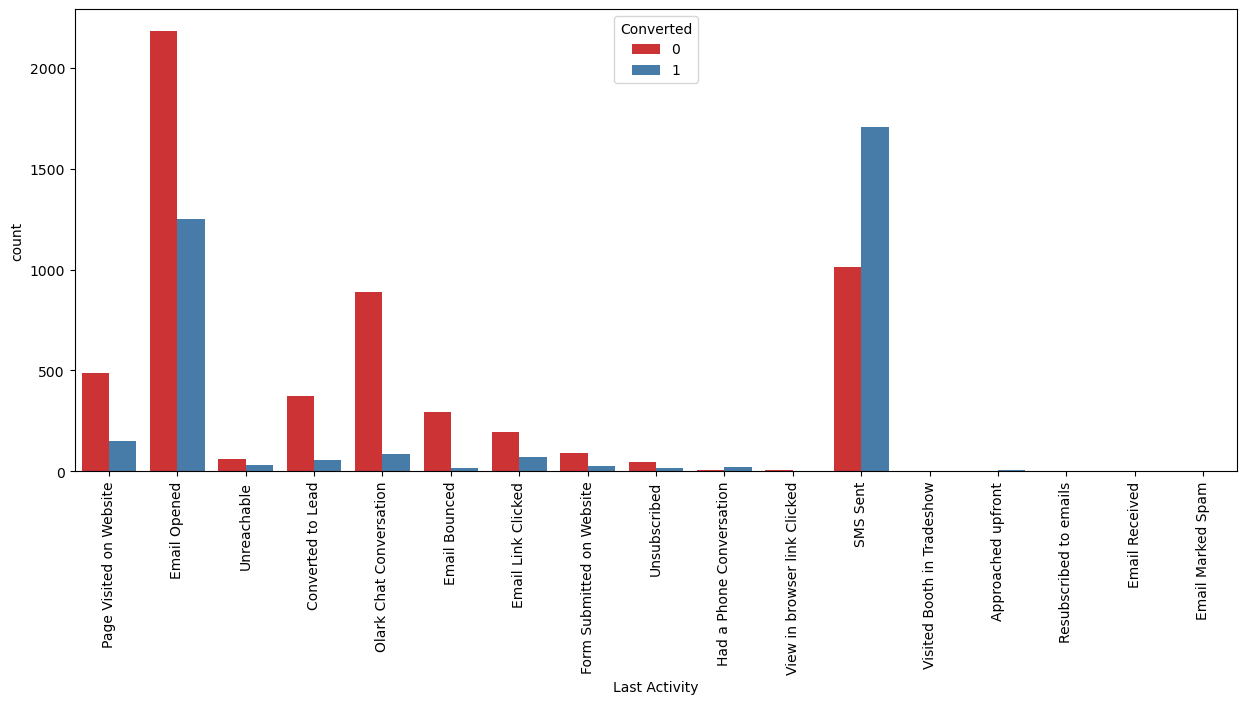

In [54]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'Last Activity', hue = 'Converted',data = lead_data,palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

In [55]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

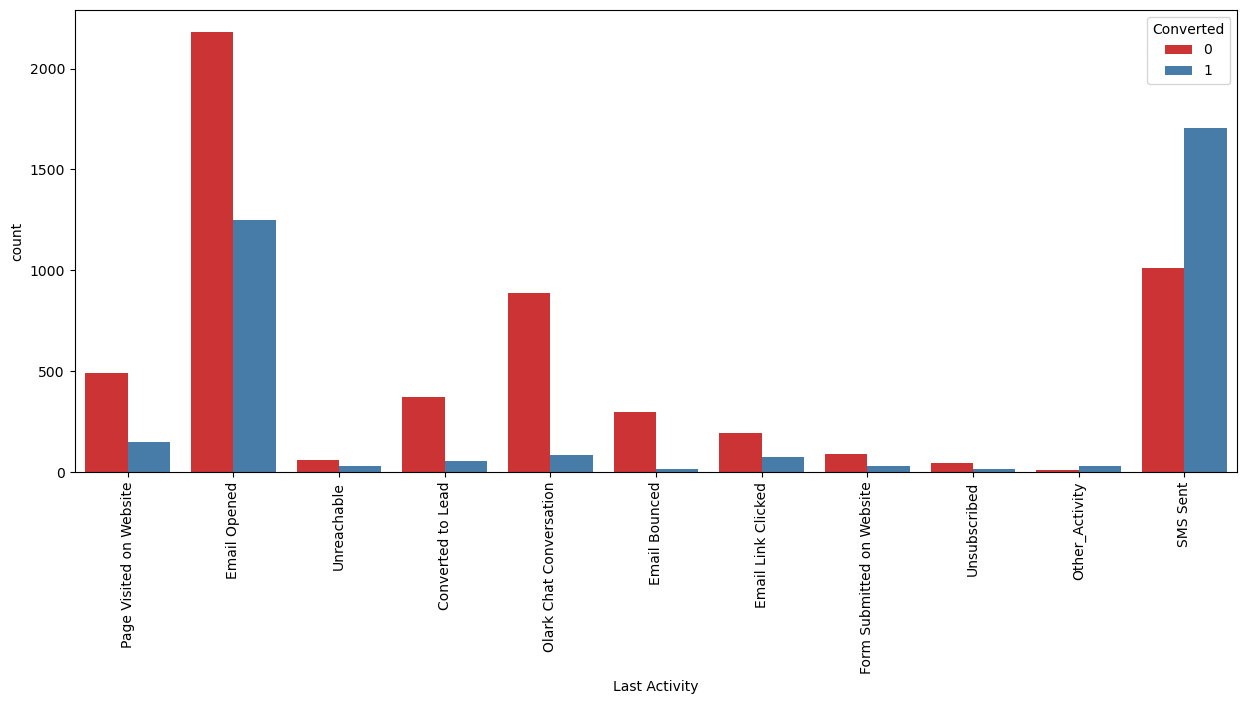

In [56]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Most of the lead have their Email opened as their last activity.
Conversion rate for leads with last activity as SMS Sent is almost 60%.

### Country

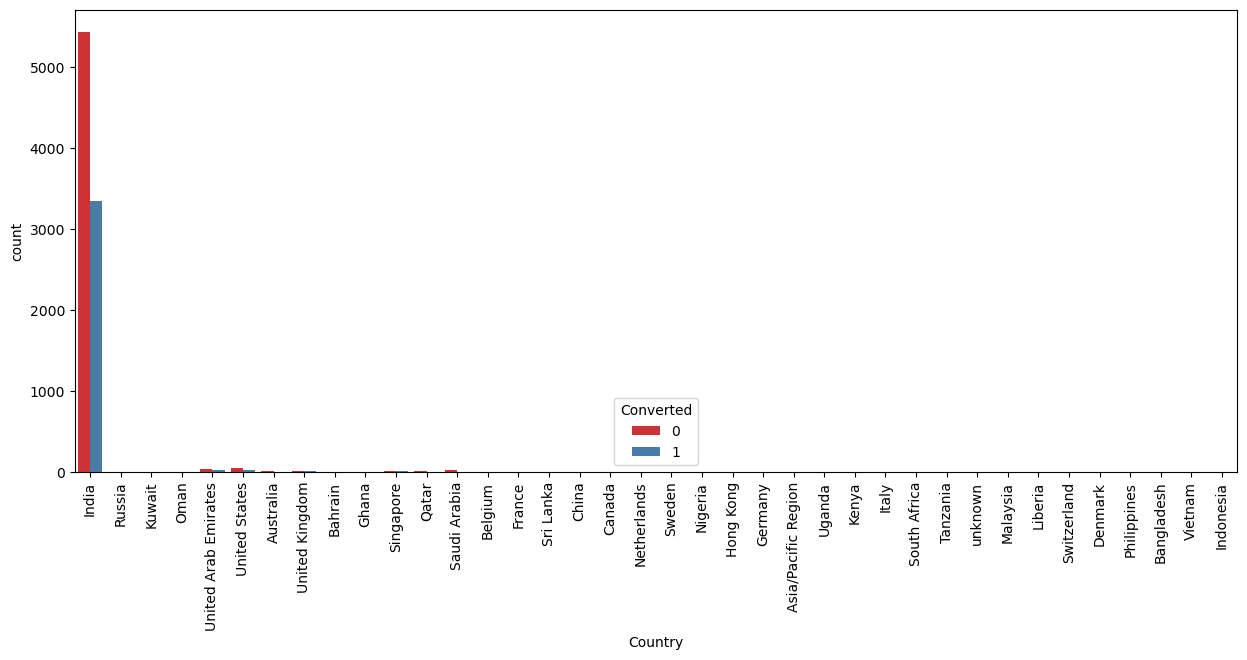

In [57]:
plt.figure(figsize = (15, 6))
sns.countplot(x = 'Country', hue = 'Converted', data = lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

#### Inference
Most values are 'India' no such inference can be drawn

### Specialization

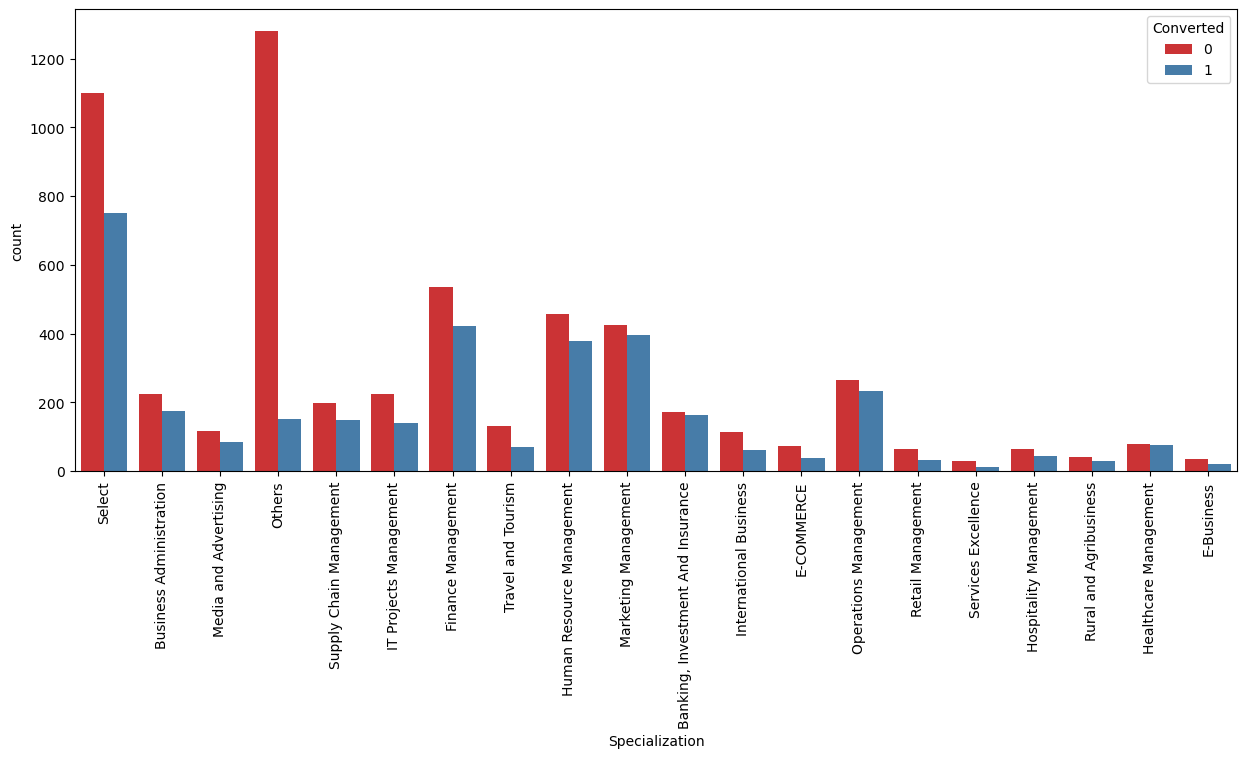

In [58]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'Specialization', hue = 'Converted', data= lead_data,palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Focus should be more on the Specialization with high conversion rate.

### What is your current occupation

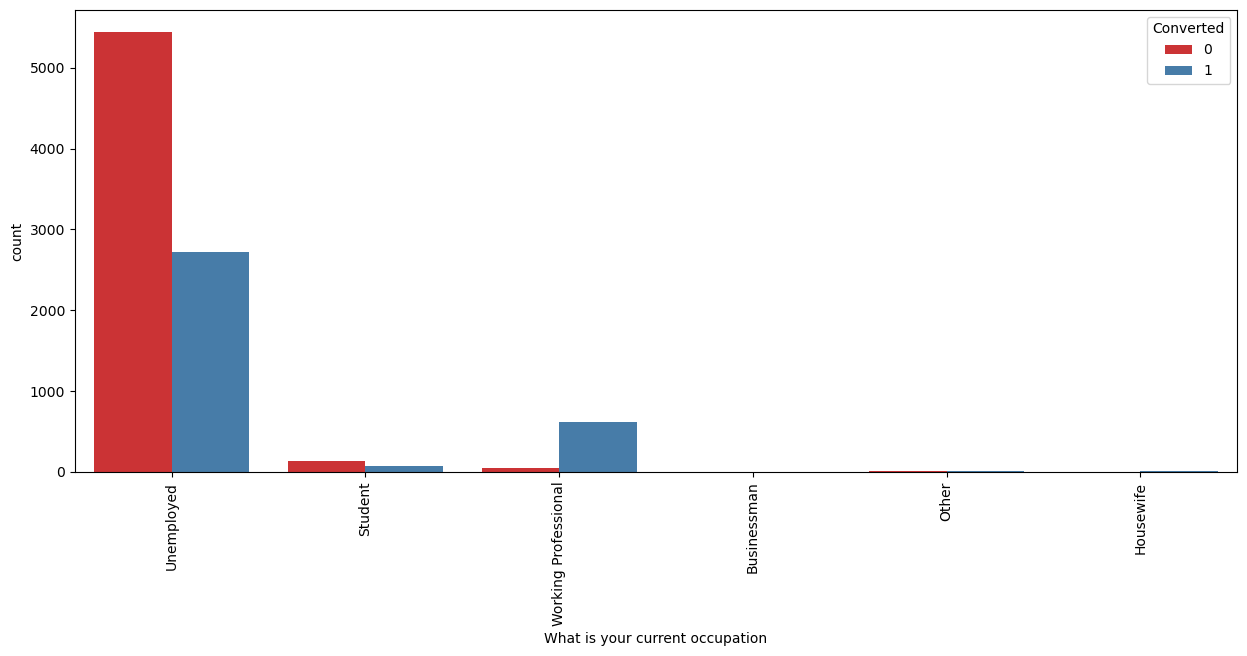

In [59]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'What is your current occupation', hue = 'Converted',data = lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but has around 30-35% conversion rate.

### Search


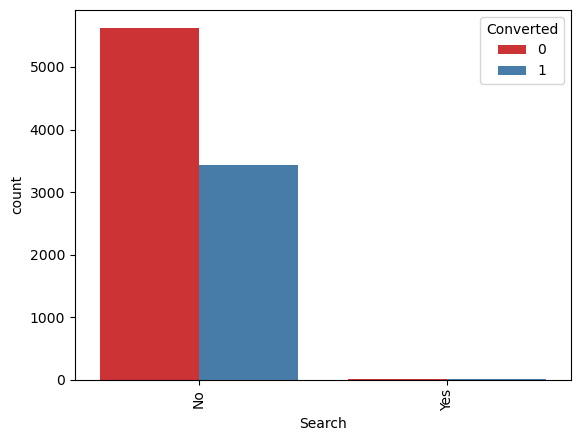

In [60]:
sns.countplot(x = 'Search', hue = 'Converted', data = lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.



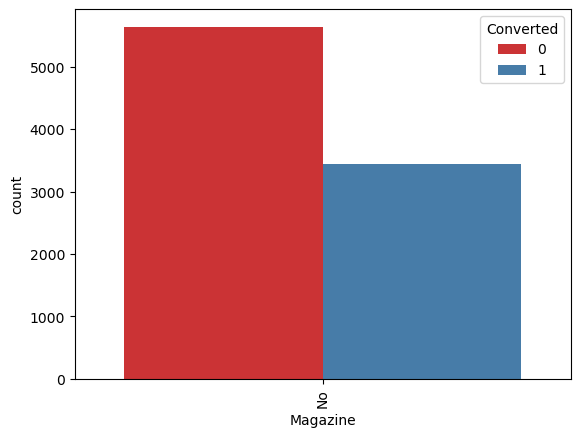

In [61]:
### Magzine
sns.countplot(x = 'Magazine', hue = 'Converted', data = lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### Newpaper Article

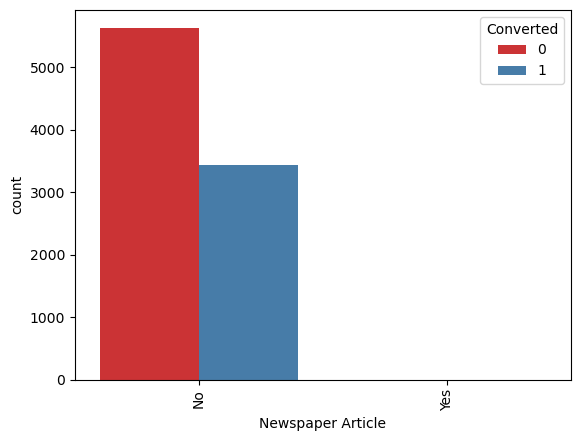

In [62]:
sns.countplot(x = 'Newspaper Article', hue = 'Converted', data = lead_data , palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### X Education Forums

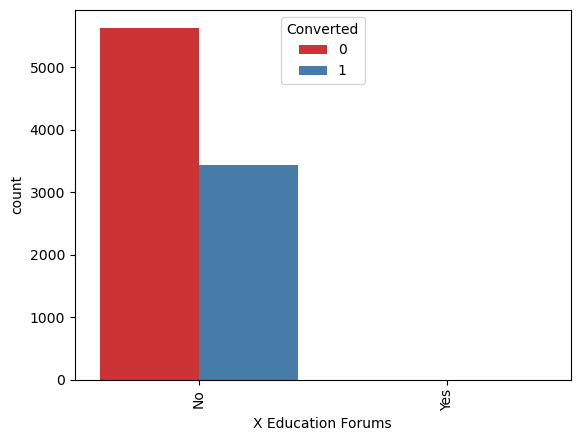

In [63]:
sns.countplot(x = 'X Education Forums', data = lead_data, hue = 'Converted', palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()


### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### Newspaper

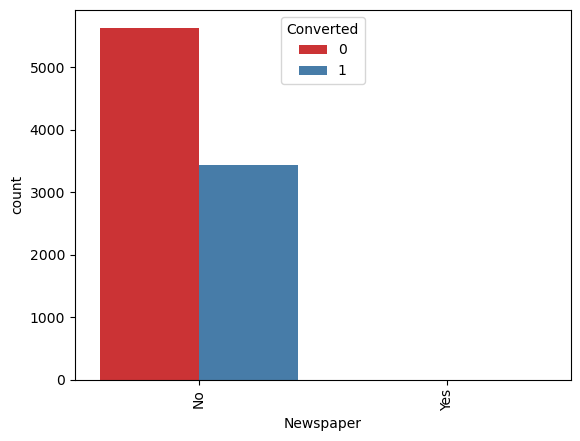

In [64]:
sns.countplot(x= 'Newspaper',hue = 'Converted', data = lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### Digital Advertisement

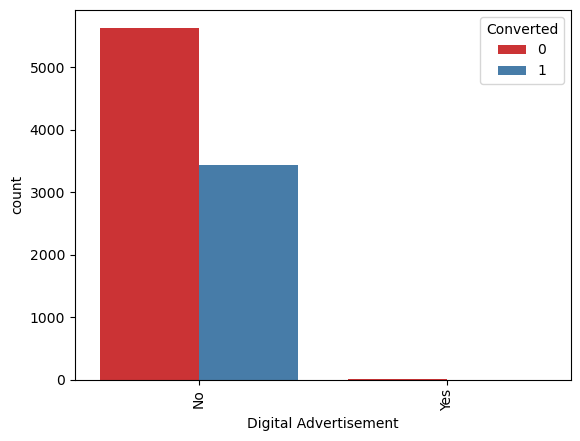

In [65]:
sns.countplot(x= 'Digital Advertisement', hue = 'Converted',data = lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### Through Recommendations 


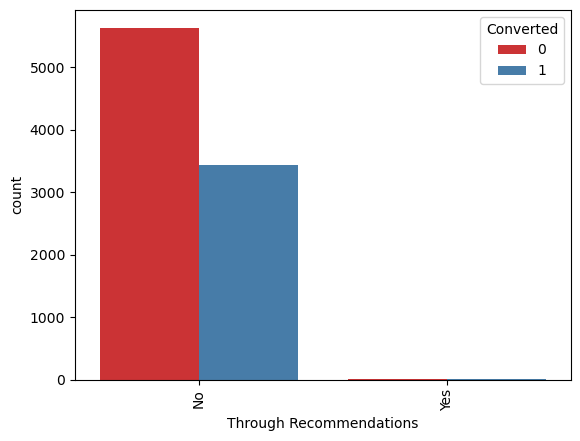

In [66]:
sns.countplot(x= 'Through Recommendations', hue = 'Converted', data = lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### Receive More Updates About Our Courses

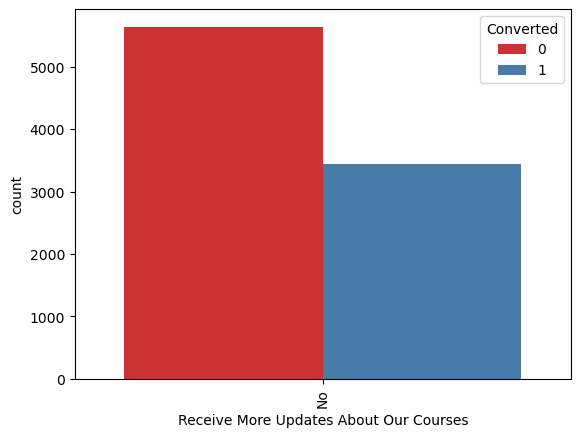

In [67]:
sns.countplot(x='Receive More Updates About Our Courses', hue= 'Converted',data = lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### Tags

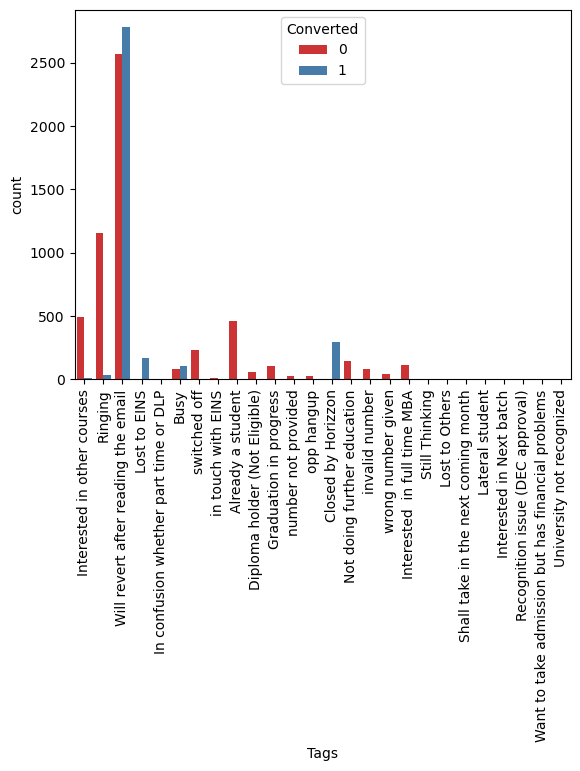

In [68]:
sns.countplot(x= 'Tags', hue= 'Converted',data = lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . So we will need to remove this column before building the model.

### Update me on Supply Chain Content


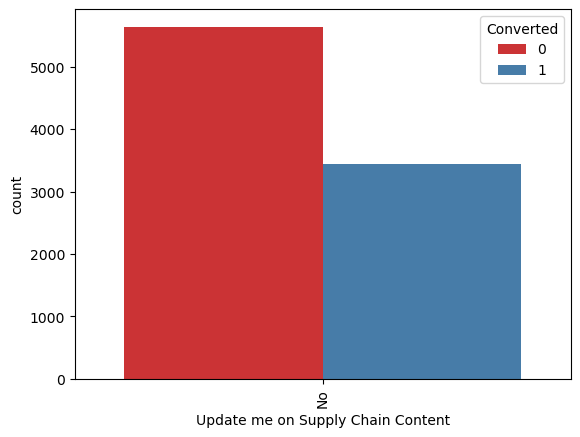

In [69]:
sns.countplot(x= 'Update me on Supply Chain Content', hue = 'Converted', data = lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.



### Get updates on DM Content 

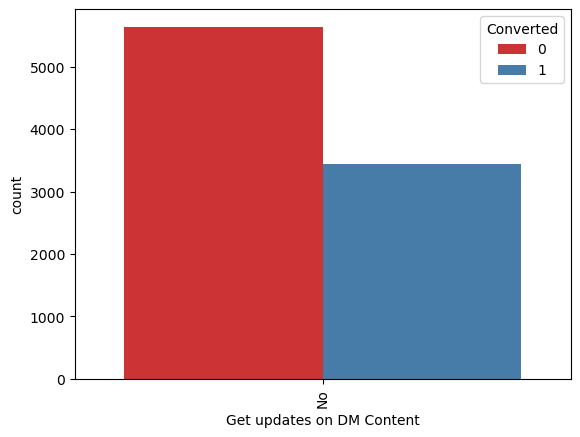

In [70]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

## City

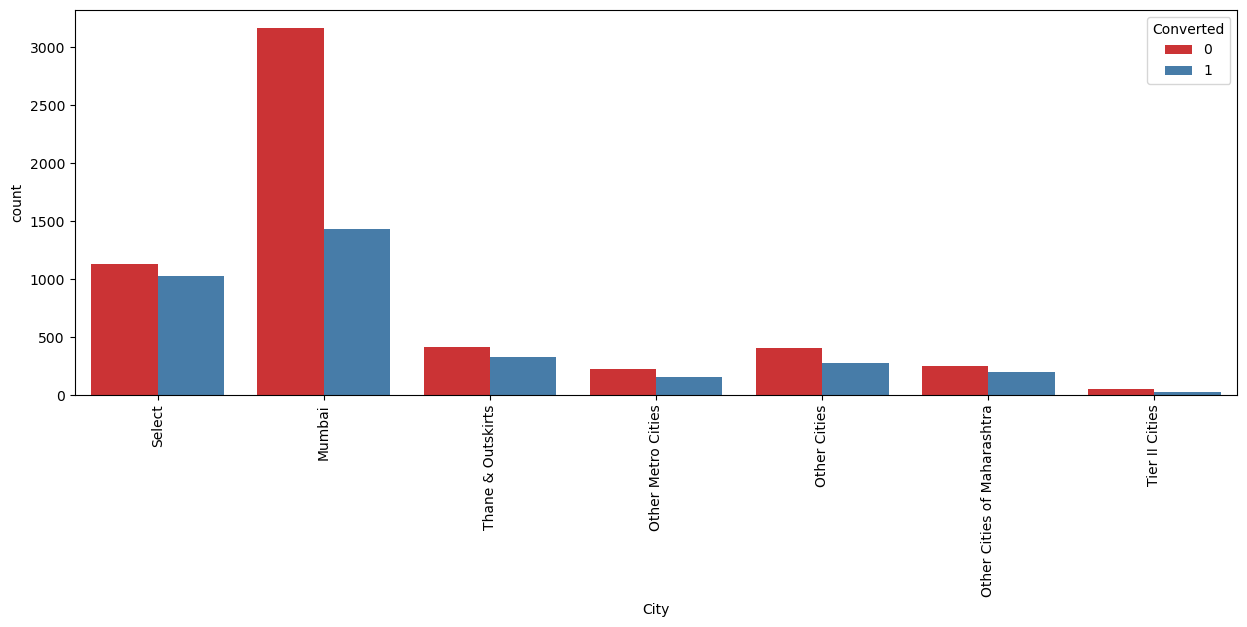

In [71]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'City', hue = 'Converted', data= lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Most leads are from mumbai with around 50% conversion rate.

### I agree to pay the amount through cheque

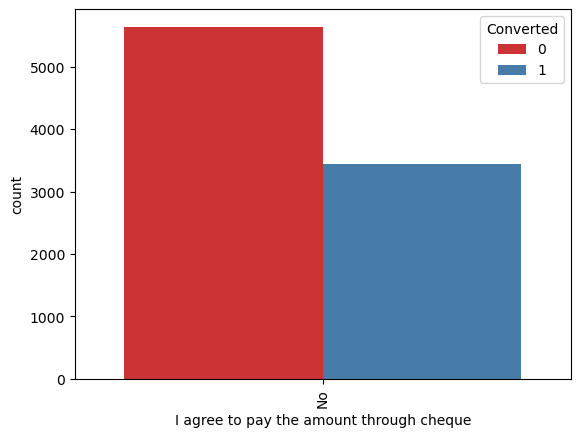

In [72]:
sns.countplot(x = 'I agree to pay the amount through cheque', hue = 'Converted', data = lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

## A Free Copy of Mastering The Interview

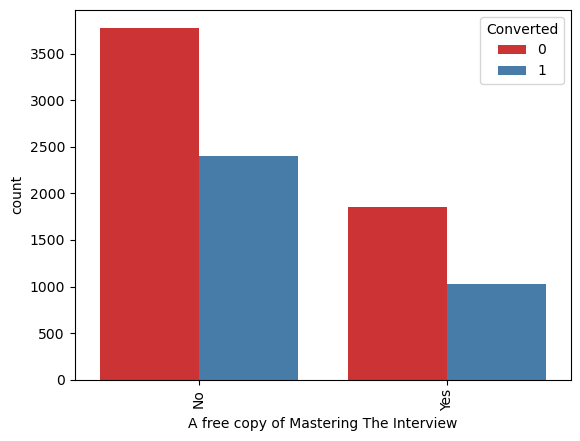

In [73]:
sns.countplot(x= 'A free copy of Mastering The Interview', hue = 'Converted', data = lead_data, palette = 'Set1' )
plt.xticks(rotation = 90)
plt.show()


### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

## Last Notable Activity

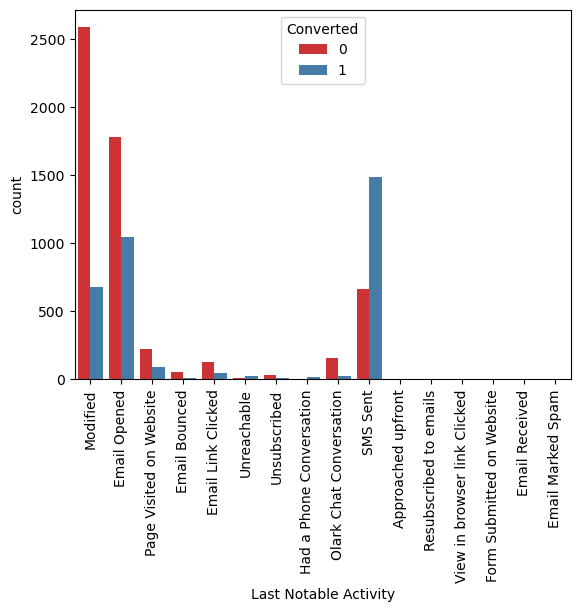

In [74]:
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = lead_data, palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

### Results
Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [75]:
# Droping the columns which are not adding any information to the model
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [76]:
#Checking the remaining column
lead_data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

In [77]:
#checking the shape 
lead_data.shape

(9074, 14)

In [78]:
# checking the data types and non null values
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

## Data Preparation 

### Converting some binary variables (Yes/No) to 1/0

In [79]:
#vars =  ['Do Not Email', 'Do Not Call']

#def binary_map(x):
    #return x.map({'Yes': 1, "No": 0})

# lead_data[vars] = lead_data[vars].apply(binary_map)

In [80]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

### Creating Dummy variables for the categorical features:
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [81]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
# concatenating the dummy_data to the lead_data dataframe 
lead_data = pd.concat([lead_data, dummy_data], axis = 1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [83]:
#Droping the coloumns for which dummies were created 
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1) 


In [84]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting the data into train and test set 

In [85]:
#importing required libararies 
from sklearn.model_selection import train_test_split

#putting features variable to x 
X = lead_data.drop(['Prospect ID', 'Converted'], axis = 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [86]:
# putting target variable to y 
y = lead_data['Converted'] 
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# splitting the data into train and test 
X_train, X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scaling the features 

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [89]:
#cheking the lead conversion rate 
converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

37.85541106458012

#### We have almost 38% lead conversion rate 

## Feature Selection Using RFE

In [90]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()  # Example of an estimator model

rfe = RFE(estimator=logreg, n_features_to_select=20)  # Create RFE with the estimator and desired number of features
rfe = rfe.fit(X_train, y_train)

In [91]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False])

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 28),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 21),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 41),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 14),
 ('Last Activity_SMS Sent', True, 1),

In [93]:
#Viewing column selected by RFE 
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'City_Select',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

## Model Building 

### Assessing the model with StatsModels

### Model: 1

In [94]:
import statsmodels.api as sm 

In [95]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.8
Date:                Sat, 15 Jul 2023   Deviance:                       5101.6
Time:                        13:03:10   Pearson chi2:                 6.31e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4113
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8602      0.660      1.303      0.192      -0.433       2.154
Do Not Email                                            -1.5630      0.196     -7.987      0.000      -1.947      -1.179
Total Time Spent on Website                              1.1166      0.041     27.320      0.000       1.036       1.197
Lead Origin_Landing Page Submission                     -1.1954      0.134     -8.953      0.000      -1.457      -0.934
Lead Origin_Lead Add Form                                1.5361      0.898      1.710      0.087      -0.224       3.296
Lead Source_Olark Chat                                   1.1635      0.124      9.370      0.000       0.920       1.407
Lead Source_Reference                                    1.7206      0.922      1.866      0.062      -0.087       3.528
Lead Source_Welingak Website                             3.9991      1.153      3.468      0.001       1.739       6.259
Last Activity_Email Opened                               0.3647      0.111      3.296      0.001       0.148       0.582
Last Activity_Other_Activity                             2.5833      0.466      5.541      0.000       1.669       3.497
Last Activity_SMS Sent                                   1.6280      0.111     14.686      0.000       1.411       1.845
Last Activity_Unsubscribed                               1.5942      0.484      3.295      0.001       0.646       2.543
Specialization_Others                                   -2.0526      0.167    -12.321      0.000      -2.379      -1.726
What is your current occupation_Housewife               21.4515   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.9431      0.683     -1.382      0.167      -2.281       0.395
What is your current occupation_Unemployed              -1.2420      0.645     -1.924      0.054      -2.507       0.023
What is your current occupation_Working Professional     1.4547      0.671      2.167      0.030       0.139       2.770
City_Select                                             -0.8735      0.135     -6.477      0.000      -1.138      -0.609
Last Notable Activity_Modified                          -0.8603      0.090     -9.599      0.000      -1.036      -0.685
Last Notable Activity_Olark Chat Conversation           -0.9155      0.349     -2.626      0.009      -1.599      -0.232
Last Notable Activity_Unreachable                        1.9914      0.498      3.999      0.000       1.015       2.967
========================================================================================================================
"""

##### Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.



In [96]:
# Dropping the column "What is your current occupation_Housewife"
col1 = cols.drop('What is your current occupation_Housewife')

## Model: 2 

In [97]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.4
Date:                Sat, 15 Jul 2023   Deviance:                       5104.9
Time:                        13:03:11   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4110
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2986      0.616      2.109      0.035       0.091       2.506
Do Not Email                                            -1.5662      0.196     -7.999      0.000      -1.950      -1.182
Total Time Spent on Website                              1.1154      0.041     27.310      0.000       1.035       1.195
Lead Origin_Landing Page Submission                     -1.1925      0.133     -8.935      0.000      -1.454      -0.931
Lead Origin_Lead Add Form                                1.5369      0.898      1.712      0.087      -0.223       3.297
Lead Source_Olark Chat                                   1.1644      0.124      9.376      0.000       0.921       1.408
Lead Source_Reference                                    1.7230      0.922      1.869      0.062      -0.084       3.530
Lead Source_Welingak Website                             4.0008      1.153      3.470      0.001       1.741       6.261
Last Activity_Email Opened                               0.3678      0.111      3.324      0.001       0.151       0.585
Last Activity_Other_Activity                             2.5859      0.466      5.546      0.000       1.672       3.500
Last Activity_SMS Sent                                   1.6295      0.111     14.697      0.000       1.412       1.847
Last Activity_Unsubscribed                               1.5989      0.484      3.304      0.001       0.651       2.547
Specialization_Others                                   -2.0523      0.167    -12.322      0.000      -2.379      -1.726
What is your current occupation_Student                 -1.3845      0.640     -2.163      0.031      -2.639      -0.130
What is your current occupation_Unemployed              -1.6830      0.600     -2.804      0.005      -2.860      -0.506
What is your current occupation_Working Professional     1.0134      0.628      1.614      0.106      -0.217       2.244
City_Select                                             -0.8752      0.135     -6.490      0.000      -1.140      -0.611
Last Notable Activity_Modified                          -0.8620      0.090     -9.619      0.000      -1.038      -0.686
Last Notable Activity_Olark Chat Conversation           -0.9129      0.349     -2.619      0.009      -1.596      -0.230
Last Notable Activity_Unreachable                        1.9910      0.498      3.996      0.000       1.014       2.967
========================================================================================================================
"""

#### Since Pvalue of 'Lead Origin_Lead Add Form' is very high, we can drop this colum 

In [98]:
col1 = col1.drop('Lead Origin_Lead Add Form')

## Model: 3

In [99]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.1
Date:                Sat, 15 Jul 2023   Deviance:                       5108.1
Time:                        13:03:11   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4107
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3115      0.616      2.130      0.033       0.104       2.519
Do Not Email                                            -1.5679      0.196     -8.008      0.000      -1.952      -1.184
Total Time Spent on Website                              1.1136      0.041     27.306      0.000       1.034       1.194
Lead Origin_Landing Page Submission                     -1.2076      0.133     -9.064      0.000      -1.469      -0.946
Lead Source_Olark Chat                                   1.1578      0.124      9.339      0.000       0.915       1.401
Lead Source_Reference                                    3.2464      0.240     13.534      0.000       2.776       3.717
Lead Source_Welingak Website                             5.5262      0.731      7.556      0.000       4.093       6.960
Last Activity_Email Opened                               0.3669      0.111      3.320      0.001       0.150       0.583
Last Activity_Other_Activity                             2.5826      0.466      5.539      0.000       1.669       3.496
Last Activity_SMS Sent                                   1.6289      0.111     14.705      0.000       1.412       1.846
Last Activity_Unsubscribed                               1.5968      0.484      3.301      0.001       0.649       2.545
Specialization_Others                                   -2.0646      0.166    -12.403      0.000      -2.391      -1.738
What is your current occupation_Student                 -1.3833      0.640     -2.161      0.031      -2.638      -0.129
What is your current occupation_Unemployed              -1.6787      0.600     -2.796      0.005      -2.855      -0.502
What is your current occupation_Working Professional     1.0151      0.628      1.617      0.106      -0.215       2.246
City_Select                                             -0.8812      0.135     -6.536      0.000      -1.145      -0.617
Last Notable Activity_Modified                          -0.8635      0.090     -9.639      0.000      -1.039      -0.688
Last Notable Activity_Olark Chat Conversation           -0.9166      0.349     -2.630      0.009      -1.600      -0.233
Last Notable Activity_Unreachable                        1.9867      0.498      3.987      0.000       1.010       2.963
========================================================================================================================
"""

#### Since Pvalue of 'What is your current occupation_Student' is very high, we can drop this column.



In [100]:
col1 = col1.drop('What is your current occupation_Student')

## Model: 4

In [101]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2556.6
Date:                Sat, 15 Jul 2023   Deviance:                       5113.2
Time:                        13:03:11   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4102
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1262      0.260      0.485      0.627      -0.384       0.636
Do Not Email                                            -1.5614      0.196     -7.986      0.000      -1.945      -1.178
Total Time Spent on Website                              1.1152      0.041     27.355      0.000       1.035       1.195
Lead Origin_Landing Page Submission                     -1.2170      0.133     -9.142      0.000      -1.478      -0.956
Lead Source_Olark Chat                                   1.1484      0.124      9.280      0.000       0.906       1.391
Lead Source_Reference                                    3.2547      0.240     13.573      0.000       2.785       3.725
Lead Source_Welingak Website                             5.5228      0.731      7.552      0.000       4.089       6.956
Last Activity_Email Opened                               0.3653      0.110      3.310      0.001       0.149       0.582
Last Activity_Other_Activity                             2.5803      0.466      5.534      0.000       1.666       3.494
Last Activity_SMS Sent                                   1.6257      0.111     14.689      0.000       1.409       1.843
Last Activity_Unsubscribed                               1.5891      0.484      3.286      0.001       0.641       2.537
Specialization_Others                                   -2.0665      0.166    -12.416      0.000      -2.393      -1.740
What is your current occupation_Unemployed              -0.4844      0.209     -2.314      0.021      -0.895      -0.074
What is your current occupation_Working Professional     2.2089      0.279      7.905      0.000       1.661       2.757
City_Select                                             -0.8862      0.135     -6.579      0.000      -1.150      -0.622
Last Notable Activity_Modified                          -0.8607      0.089     -9.620      0.000      -1.036      -0.685
Last Notable Activity_Olark Chat Conversation           -0.9320      0.349     -2.672      0.008      -1.616      -0.248
Last Notable Activity_Unreachable                        1.9908      0.497      4.002      0.000       1.016       2.966
========================================================================================================================
"""

In [102]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,12.75
2,Lead Origin_Landing Page Submission,6.23
6,Last Activity_Email Opened,3.02
13,City_Select,2.99
8,Last Activity_SMS Sent,2.77
10,Specialization_Others,2.59
14,Last Notable Activity_Modified,2.19
3,Lead Source_Olark Chat,2.14
12,What is your current occupation_Working Profes...,2.14
4,Lead Source_Reference,1.42


In [103]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

### Model: 5

In [104]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.2
Date:                Sat, 15 Jul 2023   Deviance:                       5118.4
Time:                        13:03:11   Pearson chi2:                 6.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4097
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3468      0.161     -2.158      0.031      -0.662      -0.032
Do Not Email                                            -1.5601      0.196     -7.972      0.000      -1.944      -1.177
Total Time Spent on Website                              1.1154      0.041     27.371      0.000       1.036       1.195
Lead Origin_Landing Page Submission                     -1.2125      0.133     -9.112      0.000      -1.473      -0.952
Lead Source_Olark Chat                                   1.1570      0.124      9.348      0.000       0.914       1.400
Lead Source_Reference                                    3.2654      0.240     13.627      0.000       2.796       3.735
Lead Source_Welingak Website                             5.5072      0.731      7.532      0.000       4.074       6.940
Last Activity_Email Opened                               0.3701      0.110      3.355      0.001       0.154       0.586
Last Activity_Other_Activity                             2.5657      0.466      5.500      0.000       1.651       3.480
Last Activity_SMS Sent                                   1.6154      0.111     14.617      0.000       1.399       1.832
Last Activity_Unsubscribed                               1.5728      0.484      3.252      0.001       0.625       2.521
Specialization_Others                                   -2.0803      0.166    -12.504      0.000      -2.406      -1.754
What is your current occupation_Working Professional     2.6769      0.193     13.849      0.000       2.298       3.056
City_Select                                             -0.8782      0.135     -6.526      0.000      -1.142      -0.614
Last Notable Activity_Modified                          -0.8626      0.089     -9.647      0.000      -1.038      -0.687
Last Notable Activity_Olark Chat Conversation           -0.9104      0.348     -2.614      0.009      -1.593      -0.228
Last Notable Activity_Unreachable                        1.9812      0.497      3.989      0.000       1.008       2.955
========================================================================================================================
"""

In [105]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Notable Activity_Olark Chat Conversation')

## Model: 6 

In [106]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.1
Date:                Sat, 15 Jul 2023   Deviance:                       5126.2
Time:                        13:03:11   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4090
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4358      0.158     -2.764      0.006      -0.745      -0.127
Do Not Email                                            -1.5473      0.196     -7.901      0.000      -1.931      -1.163
Total Time Spent on Website                              1.1115      0.041     27.300      0.000       1.032       1.191
Lead Origin_Landing Page Submission                     -1.2090      0.133     -9.087      0.000      -1.470      -0.948
Lead Source_Olark Chat                                   1.1350      0.124      9.188      0.000       0.893       1.377
Lead Source_Reference                                    3.2581      0.239     13.610      0.000       2.789       3.727
Lead Source_Welingak Website                             5.4812      0.731      7.498      0.000       4.048       6.914
Last Activity_Email Opened                               0.4568      0.106      4.306      0.000       0.249       0.665
Last Activity_Other_Activity                             2.6310      0.465      5.653      0.000       1.719       3.543
Last Activity_SMS Sent                                   1.6972      0.107     15.880      0.000       1.488       1.907
Last Activity_Unsubscribed                               1.6462      0.482      3.413      0.001       0.701       2.592
Specialization_Others                                   -2.1055      0.166    -12.662      0.000      -2.431      -1.780
What is your current occupation_Working Professional     2.6834      0.193     13.872      0.000       2.304       3.063
City_Select                                             -0.8823      0.135     -6.555      0.000      -1.146      -0.618
Last Notable Activity_Modified                          -0.8109      0.087     -9.294      0.000      -0.982      -0.640
Last Notable Activity_Unreachable                        2.0740      0.496      4.182      0.000       1.102       3.046
========================================================================================================================
"""

In [107]:
## Droping Last Activity_Unsubscribed as p-value is higher and to reduce variables 
col1 = col1.drop('Last Activity_Unsubscribed')

## Model: 7

In [108]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.1
Date:                Sat, 15 Jul 2023   Deviance:                       5136.2
Time:                        13:03:11   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4080
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3961      0.157     -2.523      0.012      -0.704      -0.088
Do Not Email                                            -1.3681      0.183     -7.495      0.000      -1.726      -1.010
Total Time Spent on Website                              1.1121      0.041     27.332      0.000       1.032       1.192
Lead Origin_Landing Page Submission                     -1.2140      0.133     -9.123      0.000      -1.475      -0.953
Lead Source_Olark Chat                                   1.1343      0.123      9.186      0.000       0.892       1.376
Lead Source_Reference                                    3.2498      0.239     13.591      0.000       2.781       3.718
Lead Source_Welingak Website                             5.4460      0.729      7.467      0.000       4.017       6.875
Last Activity_Email Opened                               0.4246      0.105      4.034      0.000       0.218       0.631
Last Activity_Other_Activity                             2.5969      0.465      5.580      0.000       1.685       3.509
Last Activity_SMS Sent                                   1.6557      0.106     15.677      0.000       1.449       1.863
Specialization_Others                                   -2.1098      0.166    -12.697      0.000      -2.435      -1.784
What is your current occupation_Working Professional     2.6858      0.193     13.935      0.000       2.308       3.064
City_Select                                             -0.8878      0.135     -6.600      0.000      -1.151      -0.624
Last Notable Activity_Modified                          -0.8297      0.087     -9.534      0.000      -1.000      -0.659
Last Notable Activity_Unreachable                        2.0346      0.495      4.112      0.000       1.065       3.004
========================================================================================================================
"""

In [109]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.26
6,Last Activity_Email Opened,2.24
8,Last Activity_SMS Sent,2.21
11,City_Select,2.09
3,Lead Source_Olark Chat,1.98
9,Specialization_Others,1.87
12,Last Notable Activity_Modified,1.81
4,Lead Source_Reference,1.36
1,Total Time Spent on Website,1.30
10,What is your current occupation_Working Profes...,1.19


In [110]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.26
6,Last Activity_Email Opened,2.24
8,Last Activity_SMS Sent,2.21
11,City_Select,2.09
3,Lead Source_Olark Chat,1.98
9,Specialization_Others,1.87
12,Last Notable Activity_Modified,1.81
4,Lead Source_Reference,1.36
1,Total Time Spent on Website,1.30
10,What is your current occupation_Working Profes...,1.19


#### Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-7 is our final model. We have 13 variables in our final model.



## Making Prediction on the Train set


In [111]:
#Getting the prediction values on the train set 
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.203646
1012    0.047307
9226    0.422676
4750    0.866823
7987    0.811481
1281    0.743676
2880    0.102889
4971    0.966973
7536    0.865550
1248    0.782816
dtype: float64

In [112]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20364642, 0.04730671, 0.42267637, 0.86682265, 0.81148115,
       0.74367627, 0.10288936, 0.96697299, 0.86555004, 0.78281564])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities



In [113]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.203646,3009
1,0,0.047307,1012
2,0,0.422676,9226
3,1,0.866823,4750
4,1,0.811481,7987


#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [114]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.203646,3009,0
1,0,0.047307,1012,0
2,0,0.422676,9226,0
3,1,0.866823,4750,1
4,1,0.811481,7987,1


### Making the Confusion matrix

In [115]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3472  433]
 [ 718 1728]]


In [116]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727  

In [117]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8187686978428594


### Metrics beyond simply accuracy 

In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives 

In [119]:
# Sensitivity of our logistic regression model 
print('Sensitivity:', TP/float(TP+FN))

Sensitivity: 0.7064595257563369


In [120]:
# Caluculating the Specificity 
print('Specificity:', TN/float(TN+FP))


Specificity: 0.8891165172855313


In [121]:
#calcualting false postivity rate-predicting conveted lead when the lead actually was not converted
print('False Positive Rate: ',FP/float(TN+FP))


False Positive Rate:  0.11088348271446863


In [122]:
# Positive predictive value 
print('Positive Predicive Value', TP/float(TP+FP))


Positive Predicive Value 0.7996298010180471


In [123]:
# Negative predictive value 
print('Negative predictive value:', TN/float(TN+FN))

Negative predictive value: 0.8286396181384248


#### We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.
#### We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, 
#### this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve

### Plotting the ROC Curve
#### An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

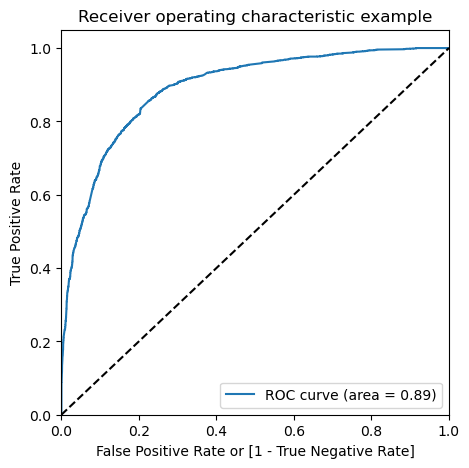

In [126]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

####  Finding Optimal Cutoff Point
#####  Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [127]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.203646,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.047307,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.422676,9226,0,1,1,1,1,1,0,0,0,0,0
3,1,0.866823,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.811481,7987,1,1,1,1,1,1,1,1,1,1,0


In [128]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

In [129]:
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.609983  0.973017  0.382586
0.2   0.2  0.766651  0.916599  0.672727
0.3   0.3  0.800189  0.869174  0.756978
0.4   0.4  0.816092  0.774734  0.841997
0.5   0.5  0.818769  0.706460  0.889117
0.6   0.6  0.807432  0.636549  0.914469
0.7   0.7  0.784286  0.526983  0.945455
0.8   0.8  0.764447  0.435814  0.970294
0.9   0.9  0.720831  0.296811  0.986428


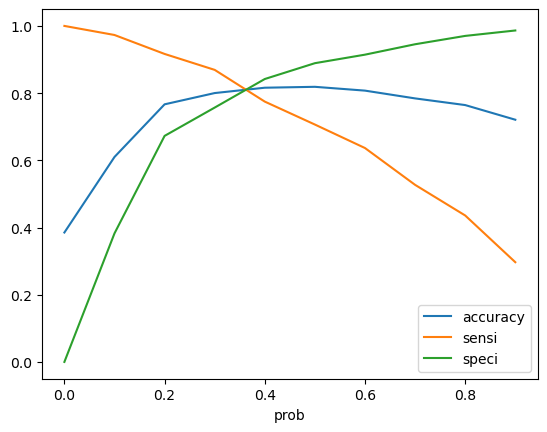

In [130]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [131]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.203646,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.047307,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.422676,9226,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.866823,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.811481,7987,1,1,1,1,1,1,1,1,1,1,0,1


#### Assigning Lead Score to the Training data

In [132]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.203646,3009,0,1,1,1,0,0,0,0,0,0,0,0,20
1,0,0.047307,1012,0,1,0,0,0,0,0,0,0,0,0,0,5
2,0,0.422676,9226,0,1,1,1,1,1,0,0,0,0,0,1,42
3,1,0.866823,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.811481,7987,1,1,1,1,1,1,1,1,1,1,0,1,81


### Model Evaluation

In [133]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8080617225633758


In [134]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3130,  775],
       [ 444, 2002]])

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [136]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))


Sensitivity :  0.8184791496320524


In [137]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8015364916773368


In [138]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19846350832266324


In [139]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7209218581202737


In [140]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8757694459988808


### Precision and Recall
* Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
* Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [141]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3472,  433],
       [ 718, 1728]])

In [142]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7996298010180471


In [143]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7064595257563369


Using sklearn utilities for the same

In [144]:
from sklearn.metrics import precision_score, recall_score

In [145]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7996298010180471


In [146]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7064595257563369


### Precision and recall tradeoff

In [147]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [148]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

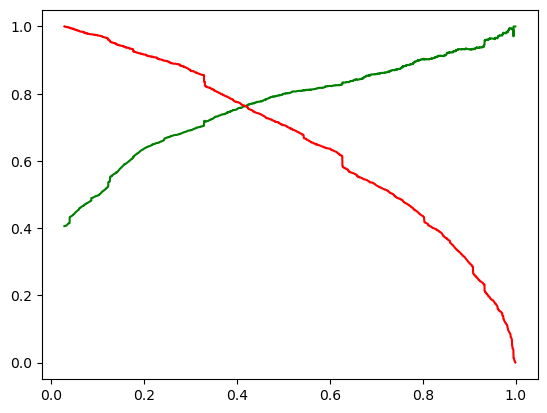

In [149]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### The above graph shows the trade-off between the Precision and Recall

### Making predictions on the test set
#### Scaling the test data

In [150]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [151]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,City_Select,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,1,0,0,1,0,0,0,0
1490,0,1.887326,1,0,0,0,1,0,0,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,1,0,0,1,0,0,0,0
4216,0,-0.888650,0,0,1,0,1,0,0,0,0,0,1,0
3830,0,-0.587751,1,0,0,0,1,0,0,0,0,0,0,0


In [153]:
import statsmodels.api as sm

# Adding a constant to the test set
X_test_sm = sm.add_constant(X_test)

# Checking if the number of columns in X_test_sm matches the number of parameters in res
if X_test_sm.shape[1] != res.params.shape[0]:
    # Get the intersection of columns between X_test_sm and X_train_sm
    common_columns = X_test_sm.columns.intersection(X_train_sm.columns)
    # Remove any extra columns from X_test_sm
    X_test_sm = X_test_sm[common_columns]

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.060135
1490    0.973382
7936    0.051246
4216    0.811582
3830    0.137162
1800    0.660871
6507    0.336405
4821    0.313856
4223    0.932979
4714    0.177444
dtype: float64

In [154]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)


In [155]:
# Let's see the head
y_pred_1.head()

,0
3271,0.060135
1490,0.973382
7936,0.051246
4216,0.811582
3830,0.137162


In [156]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [157]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [158]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.060135
1,1,1490,0.973382
2,0,7936,0.051246
3,1,4216,0.811582
4,0,3830,0.137162


In [161]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [162]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [163]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.060135
1,1490,1,0.973382
2,7936,0,0.051246
3,4216,1,0.811582
4,3830,0,0.137162


In [164]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [165]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.060135,0
1,1490,1,0.973382,1
2,7936,0,0.051246,0
3,4216,1,0.811582,1
4,3830,0,0.137162,0


In [166]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8090341535071612


In [167]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1404,  330],
       [ 190,  799]])

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.80788675429727


In [170]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8096885813148789


#### Assigning Lead Score to the Testing data

In [171]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.060135,0,6
1,1490,1,0.973382,1,97
2,7936,0,0.051246,0,5
3,4216,1,0.811582,1,81
4,3830,0,0.137162,0,14


### Observations:
#### After running the model on the Test Data , we obtain:

* Accuracy : 80.9 %
* Sensitivity : 80.7 %
* Specificity : 80.9 %

### Results :

#### Comparing the values obtained for Train & Test:

#### Train Data:

* Accuracy : 81.0 %
* Sensitivity : 81.8 %
* Specificity : 80.1 %

#### Test Data:

* Accuracy : 80.9 %
* Sensitivity : 80.7 %
* Specificity : 80.9 %

#### Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

### Finding out the leads which should be contacted:

#### The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [173]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.973382,1,97
8,4223,1,0.932979,1,93
16,1946,1,0.928417,1,93
21,2461,1,0.992074,1,99
23,5822,1,0.995127,1,100
...,...,...,...,...,...
2694,1566,1,0.954532,1,95
2699,6461,1,0.962759,1,96
2703,5741,1,0.909685,1,91
2715,6299,1,0.905903,1,91


#### So there are 372 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [174]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947,  446,
       8372, 5805, 3758,  337, 1561, 5367,  737, 6423, 8286, 7174, 4461,
       1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490, 1995,
       6532, 4498, 5797, 8687,  831, 7653,   76, 2018, 6743, 3976, 5769,
       1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481,  785,
       3265, 3285, 7433, 3858, 3810, 2009, 8106,  373, 7417, 4179, 4994,
       8568, 7268, 6784, 6754, 7236, 2960, 7753, 3983,  802,  358, 8745,
       4717,  505, 8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157,
       7175, 1675, 6999, 5826, 8492, 6499, 2481, 3439, 4612, 7129, 4793,
       1557, 4837, 2495,  822, 2378, 5075, 7699, 5638, 2342, 8077, 2727,
        720, 7489,  941, 2961, 1542, 5656, 2630, 8205, 7060, 6332, 8461,
       2427, 5087,  174, 2674, 8065, 2095, 1568, 8597, 4865, 3535, 4708,
       1304, 6066, 6538, 5700, 1388, 5815, 7970, 79

### Finding out the Important Features from our final model:

In [175]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.446004
Lead Source_Reference                                   3.249778
What is your current occupation_Working Professional    2.685798
Last Activity_Other_Activity                            2.596923
Last Notable Activity_Unreachable                       2.034601
Last Activity_SMS Sent                                  1.655729
Lead Source_Olark Chat                                  1.134335
Total Time Spent on Website                             1.112072
Last Activity_Email Opened                              0.424606
const                                                  -0.396090
Last Notable Activity_Modified                         -0.829726
City_Select                                            -0.887802
Lead Origin_Landing Page Submission                    -1.213959
Do Not Email                                           -1.368053
Specialization_Others                                  -2.109764
dtype: float64

### Recommendations:

* The company should make calls to the leads coming from the lead sources **"Welingak Websites" and "Reference"**  as these are more likely to get converted. 


* The company should make calls to the leads who are the **"working professionals"** as they are more likely to get converted.


* The company should make calls to the leads who spent **"more time on the websites"** as these are more likely to get converted.


* The company should make calls to the leads coming from the lead sources **"Olark Chat"** as these are more likely to get converted.


* The company should make calls to the leads whose last activity was **SMS Sent** as they are more likely to get converted.


* The company should not make calls to the leads whose last activity was **"Olark Chat Conversation"** as they are not likely to get converted.


* The company should not make calls to the leads whose lead origin is **"Landing Page Submission"** as they are not likely to get converted.


* The company should not make calls to the leads whose Specialization was **"Others"** as they are not likely to get converted.


* The company should not make calls to the leads who chose the option of **"Do not Email" as "yes"** as they are not likely to get converted.